# Exercise Sheet 00 (Programming and Visualisation)

In [18]:
import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

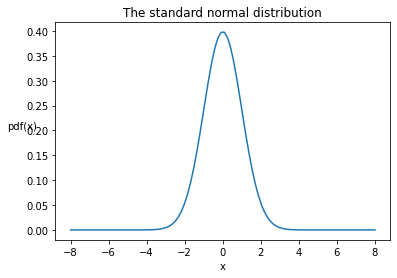

In [19]:
x = np.linspace(-8,8,100,endpoint=True)
sigma = 1
func_gauss = lambda v: 1./(sigma*np.sqrt(np.pi*2))*np.exp(-v**2/2*sigma)
y = [func_gauss(a) for a in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('pdf(x)', rotation='horizontal')
plt.title('The standard normal distribution')
plt.show()

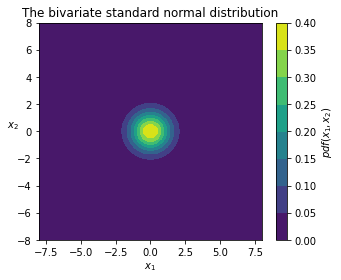

In [20]:
x = y = np.linspace(-8, 8, 50, endpoint=True)
xx, yy = np.meshgrid(x, y)
z = 1./(sigma*np.sqrt(np.pi*2))*np.exp(-(xx**2+yy**2)/2*sigma)
plt.figure(figsize=(5,4))
h = plt.contourf(x,y,z)
ax_cbar = plt.colorbar()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
ax_cbar.set_label('$pdf(x_1,x_2)$')
plt.title('The bivariate standard normal distribution')
plt.show()

## 0.6: Scatter and Line Plots

### 0.6 a) load data from file

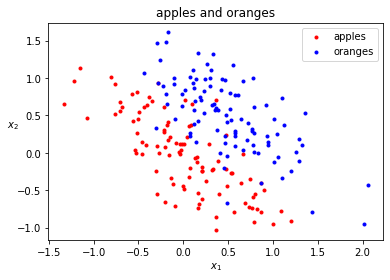

In [21]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                       dtype=np.float, skip_header=1)
x = expdat[:,:2]
y = expdat[:,-1]
plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='b', label='oranges')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()

# 2D Histogram of both classes

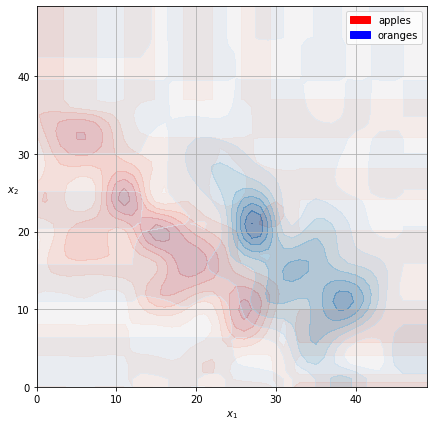

In [22]:
from scipy.interpolate import interp2d
def binedges2center(edges_x, edges_y):
    xcenters = (edges_x[:-1] + edges_x[1:]) / 2.
    ycenters = (edges_y[:-1] + edges_y[1:]) / 2.
    return xcenters, ycenters
hist_0, bin_edges_x_0, bin_edges_y_0 = np.histogram2d(x[y==0,0], x[y==0,1],
                                                 bins=10, density=True)
hist_1, bin_edges_x_1, bin_edges_y_1 = np.histogram2d(x[y==1,0], x[y==1,1],
                                                 bins=10, density=True)
bins_x_0, bins_y_1 = binedges2center(bin_edges_x_0, bin_edges_y_0)
bins_x_1, bins_y_1 = binedges2center(bin_edges_x_1, bin_edges_y_1)


fig, ax = plt.subplots(1, figsize=[7,7])
# min and max values in all directions
vmax = max(np.abs(hist_0).max(), np.abs(hist_1).max())
xmin = min(bin_edges_x_0.min(), bin_edges_x_1.min())
xmax = max(bin_edges_x_0.max(), bin_edges_x_1.max())
ymin = min(bin_edges_y_0.min(), bin_edges_y_1.min())
ymax = max(bin_edges_y_0.max(), bin_edges_y_1.max())


# interpolate for smoother density-like plot
xi2 = np.linspace(xmin, xmax, 50)
yi2 = np.linspace(ymin, ymax, 50)
f = interp2d(bin_edges_x_0[:-1], bin_edges_y_0[:-1], hist_0, kind='cubic')
hist_0_smooth = f(xi2, yi2)
f = interp2d(bin_edges_x_1[:-1], bin_edges_y_1[:-1], hist_1, kind='cubic')
hist_1_smooth = f(xi2, yi2)

step = 0.0001
levels = np.arange(0.0, vmax, step) + step

cmap = plt.cm.Reds
# proxy = [plt.Rectangle((0,0),1,1, fc=cmap(1)]
ax.contourf(hist_0_smooth, cmap=cmap, alpha=0.5)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation='horizontal')
cmap = plt.cm.Blues                       
# proxy.append(plt.Rectangle((0,0),1,1, fc=cmap(1)))
ct = ax.contourf(hist_1_smooth, cmap=cmap, alpha=0.5)
plt.grid()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='apples')
blue_patch = mpatches.Patch(color='blue', label='oranges')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# Density of both classes

/home/guybrush/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/guybrush/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/guybrush/.local/lib/python3.6/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

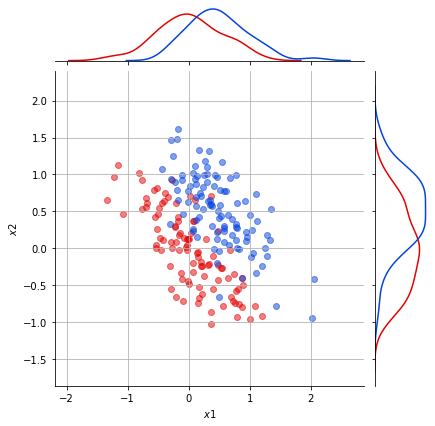

In [23]:
import seaborn as sns
import pandas as pd

def visualize(df, joint_plot=plt.scatter):
    plt.figure()
    df0 = df[df.y==0]
    df1 = df[df.y==1]
    g = sns.JointGrid(x=df0.x1, y=df0.x2)
    g = g.plot_joint(joint_plot, marker='o', alpha = 0.5)
    g.ax_joint.grid()
    g.ax_joint.set_xlabel('$'+g.ax_joint.get_xlabel()+'$')
    g.ax_joint.set_ylabel('$'+g.ax_joint.get_ylabel()+'$')
    g = g.plot_marginals(sns.kdeplot)
    
    # Now the other class
    g.x = df1.x1
    g.y = df1.x2
    g = g.plot_joint(joint_plot, marker='o', alpha = 0.5)
    g.ax_joint.grid()
    g = g.plot_marginals(sns.distplot,
                         kde=True,
                         hist=False,
                        )
    g.ax_marg_x.set_xlabel('')
    g.ax_marg_y.set_ylabel('')
    g.ax_joint.grid()
    return g
    
df = pd.DataFrame({
    'x1' : x[:,0].tolist(),
    'x2' : x[:,1].tolist(),
    'y' : y.tolist(),
    })

# Add column with Name Marks
df['class_label'] = ['apples' if yval == 0 else 'oranges' for yval in y]

with sns.xkcd_palette(['red', 'blue']):
    g = visualize(df, joint_plot=plt.scatter)
    
# Hack to get the legend in there as well
"""import matplotlib.patches as mpatches
p0 = mpatches.Patch(color='red', label='apples')
p1 = mpatches.Patch(color='blue', label='oranges')
g.ax_joint.legend(handles=[p0, p1])

with sns.xkcd_palette(['red', 'blue']):
    g = visualize(df, joint_plot=sns.kdeplot)
g.ax_joint.legend(handles=[p0, p1])
plt.legend()"""
plt.show()

# Working with vectors and matrices

In [24]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                       dtype=np.float, skip_header=1)
x = expdat[:,:2].T
y = expdat[:,-1].T
xc = np.vstack((np.ones((1,200)),x))
print(xc.shape)

(3, 200)


False
False
False


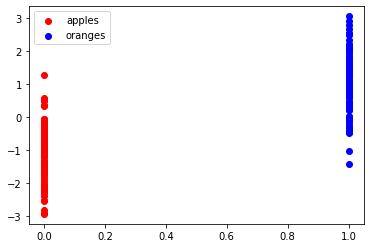

In [26]:
def project_dot_per_sample(X, w):
    p = [np.dot(w, sample) for sample in X.T]
    return np.array(p)

def project_sum_prod_per_samle(X, w):
    p = []
    for sample in X.T:
        sp = 0
        for els, elw in zip(sample, w):
            sp += els * elw
        p.append(sp)
    return np.array(p)

def project_matrix_op(X,w):
    return w @ X # @ operation only available for Python3, potentially fastest

w = [-1.05,  2.183,  2.171]
p1 = project_dot_per_sample(xc, w)
p2 = project_sum_prod_per_samle(xc, w)
p3 = project_matrix_op(xc, w)

# Check to see all yield equal results
print(np.all(p1==p2))
print(np.all(p1==p3))
print(np.all(p2==p3))

plt.scatter(y[y==0], p1[y==0], c='r', label='apples')
plt.scatter(y[y==1], p1[y==1], c='b', label='oranges')
plt.legend()
plt.show()

/home/guybrush/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/guybrush/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


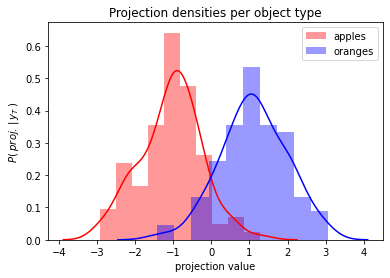

In [27]:
import seaborn as sns
ax = sns.distplot(p1[y==0], label='apples', color='red')
ax = sns.distplot(p1[y==1], ax=ax, label='oranges', color='blue')
ax.set_xlabel('projection value')
ax.set_ylabel('$P(\;proj. \, | \, y_T\; )$')
ax.set_title('Projection densities per object type')
plt.legend()
plt.show()

# 0.8: Image data

### 0.8 a) load data from file natIMG.jpg

In [ ]:
natimg = plt.imread('natIMG.jpg')
print(natimg.shape)
print(natimg)

### 0.8 b) heatmap plot using a grayscale colormap

In [ ]:
plt.figure()
plt.imshow(natimg, cmap='gray', interpolation='none')
plt.colorbar(fraction=0.02)
plt.title('image pixel matrix')

# Detect vertical and horizontal edges separately

In [ ]:
from scipy import signal
width = 3
kernel = np.zeros((width,width))
kernel[:,:int(width/2)] = -1
kernel[int(width/2),:int(width/2)] = -2
kernel[:,int(width/2):] = 1
kernel[int(width/2),int(width/2):] = 2
kernel[:,int(width/2)] = 0
print(kernel)
response_v = signal.convolve2d(natimg/255., kernel, boundary='symm', mode='same')
response_h = signal.convolve2d(natimg/255., kernel.T, boundary='symm', mode='same')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
ax1.imshow(natimg, cmap='gray', interpolation='none')
ax1.set_title("original image")
ax2.imshow(response_v, cmap='gray', interpolation='none')
ax2.set_title("vertical edges")
ax3.imshow(response_h, cmap='gray', interpolation='none')
ax3.set_title("horizontal edges")
plt.show()